In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sklearn.metrics import mean_squared_error

##Plot of SIR model
Made with estimated parameters for $\beta$ and $\alpha$.

In [ ]:
#recall that the book solves for alpha and beta. i will use their approximation of values.
alpha = 0.3
beta = 0.0025

#initial conditions.
N = 763
i0 = 25
r0 = 0
s0 = N - i0 - r0

#np.array of data
inf = [25,75,227,296,258,236,192,126,71,28,11,7]
days = np.linspace(3,14,12)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [ ]:
#SIR model
def model(y, days, beta, alpha):
    S, I, R = y
    dSdt = -beta * S * I 
    dIdt = beta * S * I - alpha * I
    dRdt = alpha * I
    return dSdt, dIdt, dRdt

In [ ]:
y0 = s0, i0, r0
# Integrate the SIR equations over the time grid, t.
ret = odeint(model, y0, days, args=(beta, alpha))
S, I, R = ret.T

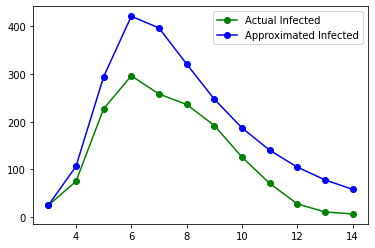

In [ ]:
#overlay actual infected with predicted infeected from above
plt.plot(days, inf, marker = "o", color = "g", label = "Actual Infected")
plt.plot(days, I, marker = "o", color = "b", label = "Approximated Infected")
plt.legend();

There are different methods to approximate the values of $\alpha$ and $\beta$.

##First Method:
Using an array of values, each potential value of $\alpha$ and $\beta$ will be run through a function. The combination of each parameter that yields the smallest MSE will be the best parameters.

In [ ]:
#create an array of potential values for beta and alpha
beta_array = np.linspace(0, 0.01, num=250)
alpha_array = np.linspace(0, 0.5, num=250)

In [ ]:
def MSEthing(true):
  mse = []
  tuple_id = []
  for m,x in enumerate(beta_array):
    for n,y in enumerate(alpha_array):
      ret = odeint(model, y0, days, args=(beta_array[m], alpha_array[n]))
      S, I, R = ret.T
      mse.append(mean_squared_error(true,I))
      tuple_id.append((beta_array[m], alpha_array[n]))
  return mse, tuple_id

In [ ]:
#takes ~1 min to execute

MSE, ID = MSEthing(inf)
min(MSE)
minpos = MSE.index(min(MSE))
ID[minpos]

(0.0023694779116465864, 0.4638554216867469)

Above are the best values for $\alpha$ and $\beta$.

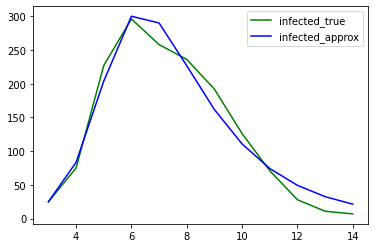

In [ ]:
#using values from before:
t_beta = ID[minpos][0]
t_alpha = ID[minpos][1]

ret = odeint(model, y0, days, args=(t_beta, t_alpha))
S, I, R = ret.T

plt.plot(days, inf, color = "g", label = "infected_true")
plt.plot(days, I, color = "b", label = "infected_approx")
plt.legend();

In [ ]:
inf_days = 1/t_alpha
inf_days

2.1558441558441563

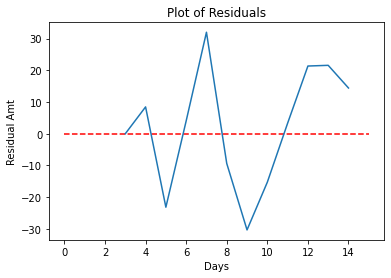

In [ ]:
#plot of residuals 
residuals = I - inf
plt.plot(days, residuals)
plt.hlines(y = 0, xmin = 0, xmax = 15, colors = 'red', linestyles='dashed')
plt.title('Plot of Residuals')
plt.xlabel('Days')
plt.ylabel('Residual Amt');

##Second Method:
Utilizing scipy.optimize.curve_fit package finds the best parameters to fit the data, given a best initial guess.

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
def func(x, days, beta, alpha):
  I = x
  dIdt = - alpha*I
  return dIdt

In [ ]:
x0 = i0
rec = odeint(func,x0,days,args = (beta,alpha))

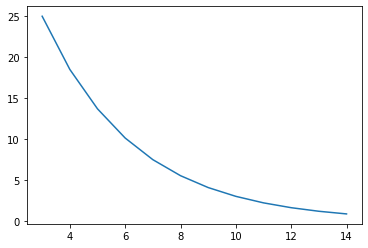

In [ ]:
plt.plot(days,rec)
rec=np.reshape(rec,len(rec))

In [ ]:
def exponentialfunc(t,a,b):
  return b*np.exp(a*t)

In [ ]:
popt, pcov = curve_fit(exponentialfunc,days,rec)

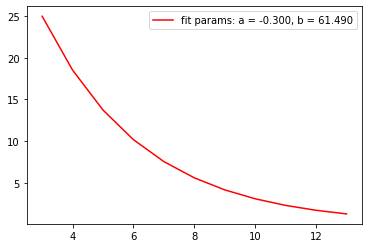

In [ ]:
days1 = np.arange(3,14,1)
plt.plot(days1,exponentialfunc(days1,*popt),'r',label='fit params: a = %5.3f, b = %5.3f' %tuple(popt))
plt.legend()